Setup

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

from pandas_datareader import data as pdr

df_invoice = pd.read_csv('data/fct_invoice.csv')
df_customer = pd.read_json('data/dim_customer.json')

In [52]:
df_invoice

,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,229,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,3433,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,644,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,4900,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,1089,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...
99452,I219422,2344,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,172,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,425,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,577,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


In [53]:
df_customer

,age,first_name,gender,id,last_name
0,48.0,Nicholas,M,0,Flores
1,NaN,Jeffery,M,1,Rowe
2,57.0,Alexis,F,2,Benton
3,73.0,Amy,F,3,Johnson
4,20.0,David,M,4,Moore
...,...,...,...,...,...
5186,NaN,Arthur,M,9428,Harris
5187,NaN,David,M,9494,Roy
5188,85.0,Thomas,M,10350,Turner
5189,NaN,April,F,10587,Sanchez


Cleaning Data

In [54]:
df_customer.rename(columns={'id':'customer_id'}, inplace=True)

Question #1

In [55]:
df_customer['customer_id'].nunique()

5191

Question #2

In [56]:
df_invoice['category'].value_counts()

Clothing           34487
Cosmetics          15097
Food & Beverage    14776
Toys               10087
Shoes              10034
Souvenir            4999
Technology          4996
Books               4981
Name: category, dtype: int64

Question #3

In [57]:
df_invoice['payment_method'].value_counts()

Cash           44447
Credit Card    34931
Debit Card     20079
Name: payment_method, dtype: int64

Question #4

In [58]:
df_invoice['total_sales'] = df_invoice['price'] * df_invoice['quantity']
category_sales=df_invoice.groupby('category')['total_sales'].sum()
category_sales.head(3)

category
Books        8.345529e+05
Clothing     1.139968e+08
Cosmetics    6.792863e+06
Name: total_sales, dtype: float64

Question #5

In [59]:
df_customer.rename(columns={'id':'customer_id'}, inplace=True)
df_merge = df_invoice.merge(df_customer, on='customer_id')
df_over45=df_merge[df_merge['age']>45]
df_over45['total_sales'].sum()

82039768.15

Question #6

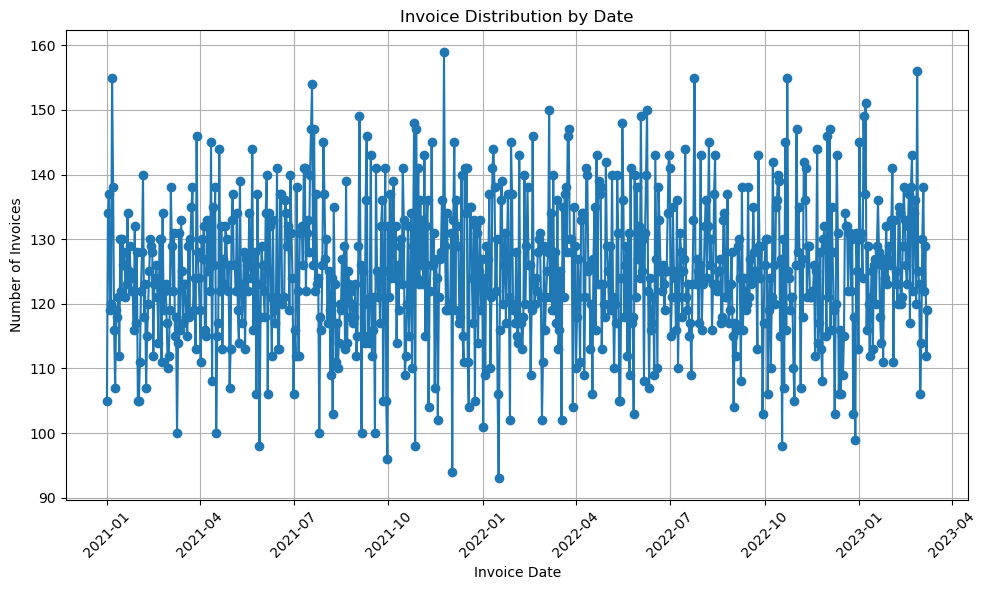

In [60]:
df_invoice['invoice_date'] = pd.to_datetime(df_invoice['invoice_date'], dayfirst=True)
invoice_dates = df_invoice.groupby('invoice_date').size()

plt.figure(figsize=(10, 6))
plt.plot(invoice_dates.index, invoice_dates.values, marker='o', linestyle='-')
plt.xlabel('Invoice Date')
plt.ylabel('Number of Invoices')
plt.title('Invoice Distribution by Date')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Question #7

In [61]:
df_invoice['invoice_date'] = pd.to_datetime(df_invoice['invoice_date'], dayfirst=True)
df_invoice = pd.merge(df_invoice, df_customer[['customer_id', 'age']], on='customer_id', how='left')
df_customer['decade_age_range'] = pd.cut(df_customer['age'], bins=range(0, 101, 10), right=False)
df_merge = df_invoice.merge(df_customer, on='customer_id')
pivot_table = df_merge.pivot_table(values='price', index='category', columns='decade_age_range', aggfunc='sum', fill_value=0)
print(pivot_table)

decade_age_range  [0, 10)   [10, 20)    [20, 30)    [30, 40)    [40, 50)  \
category                                                                   
Books                   0    3469.35    21619.05    22997.70    23361.30   
Clothing                0  518238.16  2818351.36  3074919.76  3066817.60   
Cosmetics               0   29681.80   165079.60   198054.86   181343.60   
Food & Beverage         0    3645.31    20428.38    23744.20    24460.71   
Shoes                   0  274277.69  1630061.72  1912141.62  1889335.16   
Souvenir                0    3296.13    15295.92    17548.08    17759.22   
Technology              0  287700.00  1426950.00  1669500.00  1630650.00   
Toys                    0   17203.20   102466.56   115297.28   106910.72   

decade_age_range    [50, 60)    [60, 70)    [70, 80)    [80, 90)  [90, 100)  
category                                                                     
Books               20664.60    21513.00    15437.85     7575.00          0  
Cloth